# Marketing Analytics

---

<h2>2) ANÁLISE EXPLORATÓRIA DOS DADOS</h2>

<h2>2.0) Importações</h2>

In [82]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")


import plotly.express as px

<h2>2.1) Visão Geral</h2>

In [83]:
df = pd.read_csv('data/compras.txt', sep='\t', header=None)
df.columns = ['client_id', 'value', 'date']

In [84]:
weekday_map = {
    0: 'monday',
    1: 'tuesday',
    2: 'wednesday',
    3: 'thursday',
    4: 'friday',
    5: 'saturday',
    6: 'sunday'
}

In [85]:
df['date'] = pd.to_datetime(df['date'])

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_week'] = df['date'].dt.dayofweek
df['week'] = df['date'].dt.weekofyear
df['day_week_name'] = df['day_week'].map(weekday_map)

In [86]:
df.head()

client_id  value       date  day  month  year  day_week  week day_week_name
0        760   25.0 2009-11-06    6     11  2009         4    45        friday
1        860   50.0 2012-09-28   28      9  2012         4    39        friday
2       1200  100.0 2005-10-25   25     10  2005         1    43       tuesday
3       1420   50.0 2009-07-09    9      7  2009         3    28      thursday
4       1940   70.0 2013-01-25   25      1  2013         4     4        friday

In [87]:
df.describe().T

count           mean           std     min      25%       50%  \
client_id  51243.0  108934.547938  67650.610139    10.0  57720.0  102440.0   
value      51243.0      62.337195    156.606801     5.0     25.0      30.0   
day        51243.0      18.157992      9.259684     1.0     10.0      19.0   
month      51243.0       8.395761      3.526799     1.0      5.0      10.0   
year       51243.0    2010.869699      2.883072  2005.0   2009.0    2011.0   
day_week   51243.0       3.106044      1.420202     0.0      2.0       3.0   
week       51243.0      32.205491     16.857996     1.0     17.0      38.0   

                75%       max  
client_id  160525.0  264200.0  
value          60.0    4500.0  
day            26.0      31.0  
month          12.0      12.0  
year         2013.0    2015.0  
day_week        4.0       6.0  
week           48.0      53.0

In [88]:
df.shape

(51243, 9)

In [89]:
df.isnull().sum()

client_id        0
value            0
date             0
day              0
month            0
year             0
day_week         0
week             0
day_week_name    0
dtype: int64

<h2>2.2) Análise por atributo individual</h2>

<h3>2.2.1) Cliente (client_id)</h2>

In [90]:
df_client = df.copy()
df_client = pd.DataFrame(df_client.groupby('client_id', as_index=False)['value'].count().sort_values(by='value', ascending=False)).head(20)
df_client['client_id'] = df_client['client_id'].astype(str)
df_client.head(5)

client_id  value
457       9720     45
6978    109370     41
7868    119430     38
534      10720     37
526      10640     34

In [91]:
fig = px.bar(x=df_client['client_id'], y=df_client['value'].values, text=df_client['value'].values)

fig.update_layout(
    title='<span>Quantidade de compras por clientes (Top 20)</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Quantidade</span>'),
    xaxis=dict(title='<span>Clientes</span>')
)

fig.show()

In [92]:
df_client = df.copy()
df_client = df_client.groupby(['client_id'], as_index=False)['value'].sum().sort_values(by='value', ascending=False).head(20)
df_client['client_id'] = df_client['client_id'].astype(str)
df_client.head(5)

client_id    value
734       13610  24350.0
9913     144610  17000.0
6020      98550  15507.0
11383    164930  14000.0
9621     141340  13351.0

In [93]:
fig = px.bar(x=df_client['client_id'], y=df_client['value'].values, text=df_client['value'].values)

fig.update_layout(
    title='<span>Clientes que mais gastaram na loja (Top 20)</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Valor $</span>'),
    xaxis=dict(title='<span>Clientes</span>')
)

fig.show()

<h3>2.2.1) Valores (value)</h2>

In [94]:
df_value = df.copy()
df_value['value'].describe()

count    51243.000000
mean        62.337195
std        156.606801
min          5.000000
25%         25.000000
50%         30.000000
75%         60.000000
max       4500.000000
Name: value, dtype: float64

In [95]:
fig = px.box(df_value, y='value')

fig.update_layout(
    title='<span>Boxplot para verificar outliers</span>', 
    autosize=False,
    width=600,
    height=600,
)

fig.show()

[Text(0.5, 1.0, 'Histograma de valores (sem outliers)')]

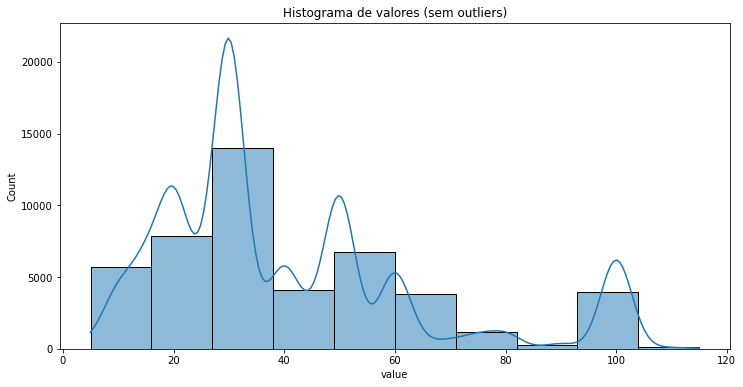

In [96]:
df_value_filter = df_value.loc[df_value['value'] <= 115]

plt.figure(figsize=(12, 6))
sns.histplot(df_value_filter['value'], kde=True, bins=10).set(title='Histograma de valores (sem outliers)')

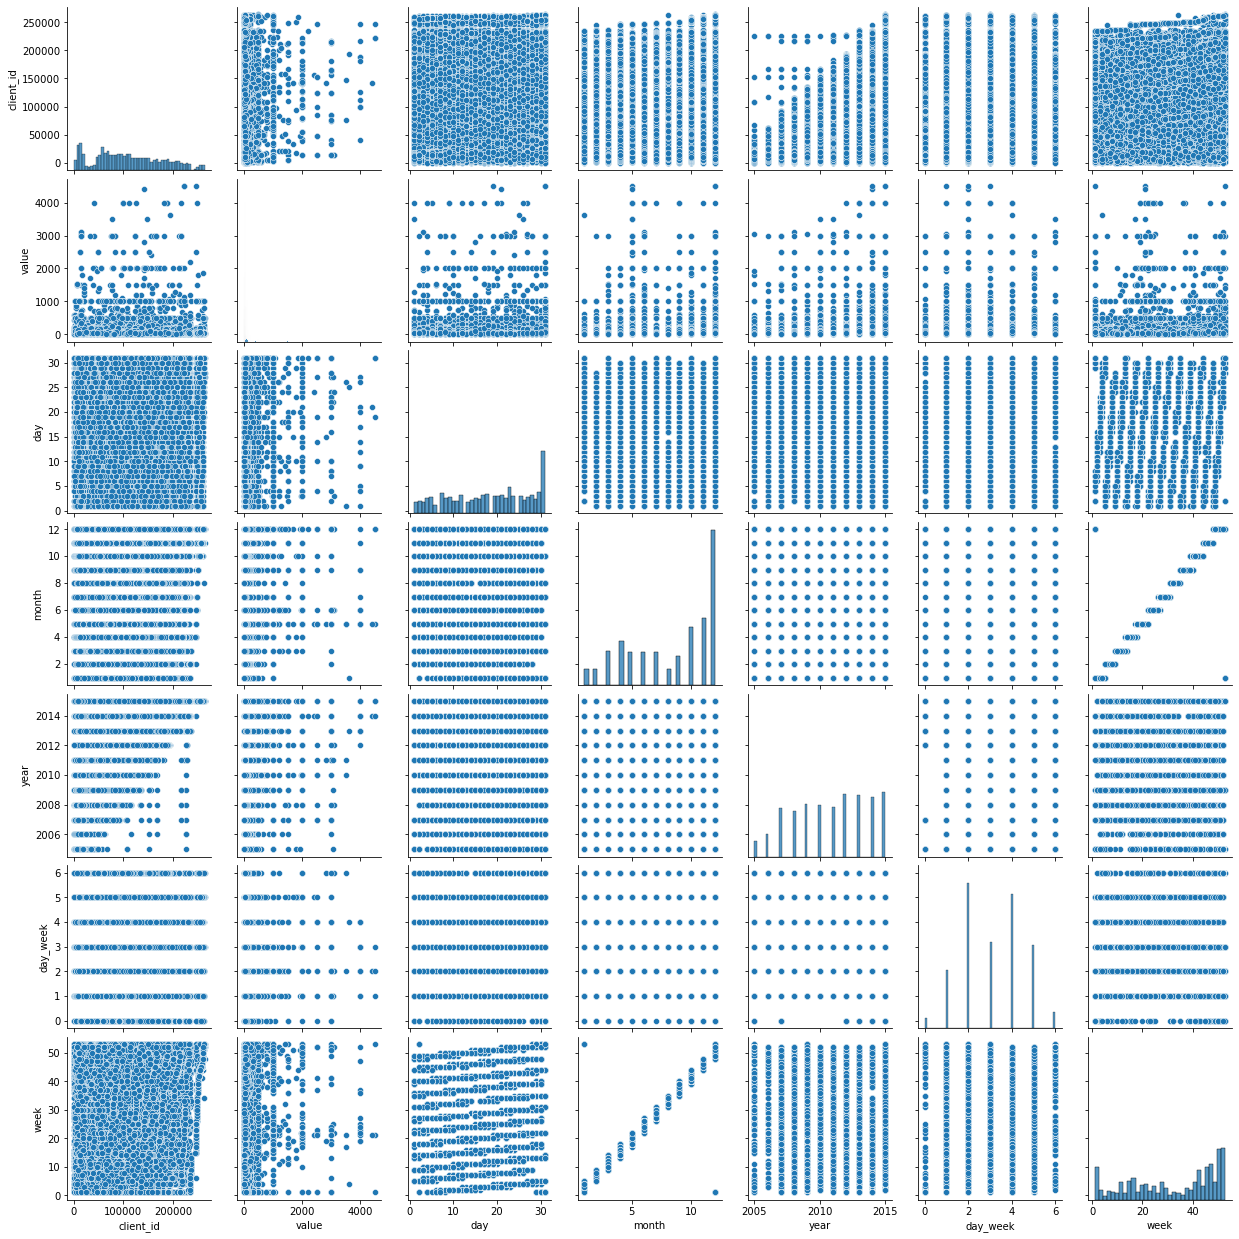

In [97]:
sns.pairplot(df_value)

[Text(0.5, 1.0, 'Matriz de Correlação')]

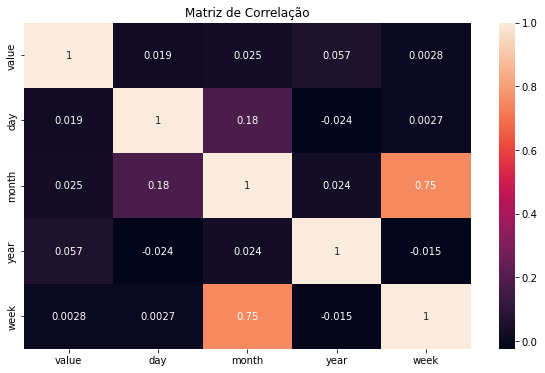

In [98]:
df_value_filter = df_value[['value', 'day', 'month', 'year', 'week']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(df_value_filter, annot=True).set(title='Matriz de Correlação')

<h3>2.2.3) Ano (year)

In [99]:
df_year = df.copy()
df_year = df.groupby(['year'], as_index=False)['value'].count().sort_values(by='year', ascending=True)
df_year['year'] = df_year['year'].astype(str)
df_year.sort_values(by='value', ascending=False)

year  value
10  2015   6197
7   2012   5960
8   2013   5912
9   2014   5739
4   2009   5054
5   2010   4939
6   2011   4785
2   2007   4674
3   2008   4331
1   2006   2182
0   2005   1470

In [100]:
fig = px.bar(x=df_year['year'], y=df_year['value'].values, text=df_year['value'].values)

fig.update_layout(
    title='<span>Quantidade de vendas por ano</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Quantidade</span>'),
    xaxis=dict(title='<span>Anos</span>')
)

fig.show()

In [101]:
df_year = df.copy()
df_year = df.groupby(['year'], as_index=False)['value'].sum().sort_values(by='year', ascending=True)
df_year['year'] = df_year['year'].astype(str)
df_year.sort_values(by='value', ascending=False)

year      value
10  2015  478394.13
9   2014  432665.20
8   2013  401610.18
7   2012  374963.34
6   2011  303939.85
5   2010  290116.92
4   2009  256466.51
2   2007  230260.00
3   2008  229853.88
1   2006  114010.49
0   2005   82064.40

In [102]:
fig = px.bar(x=df_year['year'], y=df_year['value'].values, text=df_year['value'].values)

fig.update_layout(
    title='<span>Valor total de vendas por ano</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Valor $</span>'),
    xaxis=dict(title='<span>Anos</span>')
)

fig.show()

<h3>2.2.4) Mês (month)</h3>

In [103]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

In [104]:
df_month = df.copy()
df_month = df_month.groupby(['month'], as_index=False)['value'].count()
df_month['month_name'] = df_month['month'].map(month_map)

df_month.sort_values(by='value', ascending=False)

month  value month_name
11     12  14888   December
10     11   6384   November
9      10   5570    October
3       4   4234      April
2       3   3278      March
4       5   3206        May
6       7   3159       July
5       6   3126       June
8       9   2768  September
1       2   1562   February
7       8   1553     August
0       1   1515    January

In [105]:
fig = px.bar(df_month, x='month_name', y='value', text='value')

fig.update_layout(
    title='<span>Quantidade de vendas por mês</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Quantidade</span>'),
    xaxis=dict(title='<span>Meses</span>')
)

fig.show()

In [106]:
df_month = df.copy()
df_month = df_month.groupby(['month'], as_index=False)['value'].sum()
df_month['month_name'] = df_month['month'].map(month_map)

df_month.sort_values(by='value', ascending=False)

month       value month_name
11     12  1068698.89   December
10     11   351456.99   November
9      10   303177.34    October
4       5   279160.43        May
5       6   219930.37       June
3       4   214535.13      April
8       9   190297.85  September
2       3   169040.47      March
6       7   165185.74       July
1       2    80822.48   February
0       1    76192.36    January
7       8    75846.85     August

In [107]:
fig = px.bar(df_month, x='month_name', y='value', text='value')

fig.update_layout(
    title='<span>Quantidade de vendas por mês</span>', 
    autosize=False,
    width=1200,
    height=400,
    yaxis=dict(title='<span>Quantidade</span>'),
    xaxis=dict(title='<span>Meses</span>')
)

fig.show()

<h3>2.2.5) Dia do mês (day) e mês (month)</h3>

In [108]:
df_day = df.copy()
df_day = df_day.groupby(['day', 'month'], as_index=False)['value'].agg(['count', 'sum'])

df_day.reset_index().head(10).sort_values(by='count', ascending=False)

day  month  count      sum
4    1      6    164  8905.00
1    1      3    117  5300.00
8    1     10     99  7522.00
5    1      7     84  8720.00
2    1      4     80  3500.00
7    1      9     59  4275.24
0    1      2     34  2660.00
6    1      8     26  2241.00
9    1     11      3   280.00
3    1      5      2  3550.00

In [109]:
df_day.reset_index().head(10).sort_values(by='sum', ascending=False)

day  month  count      sum
4    1      6    164  8905.00
5    1      7     84  8720.00
8    1     10     99  7522.00
1    1      3    117  5300.00
7    1      9     59  4275.24
3    1      5      2  3550.00
2    1      4     80  3500.00
0    1      2     34  2660.00
6    1      8     26  2241.00
9    1     11      3   280.00

<h3>2.2.6) Dia da semana (day_week e day_week_name)</h3>

In [110]:
df_day = df.copy()
df_day = df_day.groupby(['day_week_name', 'day_week'], as_index=False)['value'].agg(['count', 'sum'])

df_day.sort_values(by='count', ascending=False)

count        sum
day_week_name day_week                  
wednesday     2         13970  832852.47
friday        4         12828  727430.95
thursday      3          8292  560034.88
saturday      5          8023  481037.66
tuesday       1          5626  403088.66
sunday        6          1549  107991.28
monday        0           955   81909.00

<h3>2.2.7) Semana doa ano (week)</h3>

In [111]:
df_week = df.copy()

df_week = df_week.groupby(['week'], as_index=False)['value'].agg(['count', 'sum'])
df_week.head(10).sort_values(by='count', ascending=False)

count        sum
week                  
1      2897  236555.48
10      646   30812.00
4       637   34894.55
6       465   25018.62
9       455   21426.43
7       430   21480.43
5       408   21440.00
3       326   14711.45
8       318   14594.00
2       278   13941.36

In [112]:
df_week.head(10).sort_values(by='sum', ascending=False)

count        sum
week                  
1      2897  236555.48
4       637   34894.55
10      646   30812.00
6       465   25018.62
7       430   21480.43
5       408   21440.00
9       455   21426.43
3       326   14711.45
8       318   14594.00
2       278   13941.36

<h2>2.2) Análise de Variabilidade e Crescimento das vendas</h2>

<h3>2.2.1) Variabilidade por ano</h3>

In [113]:
df_agg_year = pd.pivot_table(df, index='year', values='value', aggfunc=[np.count_nonzero, np.sum])
# Poderia ter sido escrito da seguinte maneira:
# df_agg_year = df.groupby(['year'])['value'].count()
# Utilizei o pivot_table para exercitar outra forma de visualização dos dados por outro ângulo

df_agg_year.head(10)

count_nonzero        sum
             value      value
year                         
2005          1470   82064.40
2006          2182  114010.49
2007          4674  230260.00
2008          4331  229853.88
2009          5054  256466.51
2010          4939  290116.92
2011          4785  303939.85
2012          5960  374963.34
2013          5912  401610.18
2014          5739  432665.20

In [114]:
index = list(df_agg_year.index.astype(str))
values_count = (df_agg_year['count_nonzero'].values / df_agg_year['count_nonzero'].values.mean()[np.newaxis]).reshape(-1)
values_sum = (df_agg_year['sum'].values / df_agg_year['sum'].values.mean()[np.newaxis]).reshape(-1)

fig = go.Figure()
fig.add_trace(go.Line(
    x=index, 
    y=values_count,
    name='Quantidade de vendas'
    #text=values_count
))

fig.add_trace(go.Line(
    x=index, 
    y=values_sum,
    name='Somatório de vendas'
    #text=values_count,
))


fig.update_layout(
    title='<span>Crescimento relativo anual por quantidade e somatório de vendas</span>', 
    autosize=False,
    width=1200,
    height=500,
    yaxis=dict(title='<span>Crescimento</span>'),
    xaxis=dict(title='<span>Anos</span>')
)

fig.show()

<h3>2.2.2) Variabilidade por meses</h3>

In [115]:
df_agg_month = pd.pivot_table(df, index=['month'], values='value', aggfunc=[np.count_nonzero, np.sum]).reset_index()
df_agg_month['month_name'] = df_agg_month['month'].map(month_map)
df_agg_month

month count_nonzero         sum month_name
                 value       value           
0      1          1515    76192.36    January
1      2          1562    80822.48   February
2      3          3278   169040.47      March
3      4          4234   214535.13      April
4      5          3206   279160.43        May
5      6          3126   219930.37       June
6      7          3159   165185.74       July
7      8          1553    75846.85     August
8      9          2768   190297.85  September
9     10          5570   303177.34    October
10    11          6384   351456.99   November
11    12         14888  1068698.89   December

In [116]:
index = df_agg_month['month_name']
values_count = (df_agg_month['count_nonzero'].values / df_agg_month['count_nonzero'].values.mean()[np.newaxis]).reshape(-1)
values_sum = (df_agg_month['sum'].values / df_agg_month['sum'].values.mean()[np.newaxis]).reshape(-1)

fig = go.Figure()
fig.add_trace(go.Line(
    x=index, 
    y=values_count,
    name='Quantidade de vendas'
    #text=values_count
))

fig.add_trace(go.Line(
    x=index, 
    y=values_sum,
    name='Somatório de vendas'
    #text=values_count,
))


fig.update_layout(
    title='<span>Variabilidade mensal por quantidade e somatório de vendas</span>', 
    autosize=False,
    width=1000,
    height=400,
    yaxis=dict(title='<span>Variabilidade</span>'),
    xaxis=dict(title='<span>Meses</span>')
)

fig.show()

<h3>2.2.3) Variabilidade por dias</h3>

In [117]:
df_agg_day = pd.DataFrame(df.groupby(['day_week_name', 'day_week'])['value'].sum()).apply(lambda x: 100 * x/ x.sum())
df_agg_day.sort_values(by='value', ascending=False)

value
day_week_name day_week           
wednesday     2         26.072716
friday        4         22.772461
thursday      3         17.532073
saturday      5         15.059039
tuesday       1         12.618821
sunday        6          3.380702
monday        0          2.564188

In [118]:
df_agg_day = df_agg_day.sort_values(by='day_week', ascending=True)
df_agg_day = df_agg_day.reset_index()

index = df_agg_day['day_week_name']
values = df_agg_day['value']

fig = px.line(x=index, y=values)

fig.update_layout(
    title='<span>Porcentagem de vendas por dia da semana</span>', 
    autosize=False,
    width=1000,
    height=400,
    yaxis=dict(title='<span>Porcentagem de vendas</span>'),
    xaxis=dict(title='<span>Dias da semana</span>')
)

fig.show()

<h3>2.2.4) Variabilidade por semana</h3>

In [119]:
df_agg_week = pd.pivot_table(df, index='week', values='value', aggfunc=[np.count_nonzero, np.sum]).reset_index()

index = df_agg_week['week'].astype(str)
values_count = (df_agg_week['count_nonzero'].values / df_agg_week['count_nonzero'].values.mean()[np.newaxis]).reshape(-1)
values_sum = (df_agg_week['sum'].values / df_agg_week['sum'].values.mean()[np.newaxis]).reshape(-1)

fig = go.Figure()
fig.add_trace(go.Line(
    x=index, 
    y=values_count,
    name='Quantidade de vendas'
    #text=values_count
))

fig.add_trace(go.Line(
    x=index, 
    y=values_sum,
    name='Somatório de vendas'
    #text=values_count,
))


fig.update_layout(
    title='<span>Variabilidade semanal por quantidade e somtaório de vendas</span>', 
    autosize=False,
    width=1400,
    height=400,
    yaxis=dict(title='<span>Variabilidade</span>'),
    xaxis=dict(title='<span>Semanas do ano</span>')
)

fig.show()

--- 

<h2>3) SEGMENTAÇÃO ESTATÍSTICA E HIERÁRQUICA PARA EQUIPE DE MARKETING</h2>

<h2>3.0) Importações</h2>

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.decomposition import PCA

<h2>3.1) Análise Exploratória</h2>

In [121]:
current_date = df['date'].max() + pd.Timedelta(days=1)

df['days_since'] = (current_date - df['date']).dt.days

df.head()

client_id  value       date  day  month  year  day_week  week  \
0        760   25.0 2009-11-06    6     11  2009         4    45   
1        860   50.0 2012-09-28   28      9  2012         4    39   
2       1200  100.0 2005-10-25   25     10  2005         1    43   
3       1420   50.0 2009-07-09    9      7  2009         3    28   
4       1940   70.0 2013-01-25   25      1  2013         4     4   

  day_week_name  days_since  
0        friday        2247  
1        friday        1190  
2       tuesday        3720  
3      thursday        2367  
4        friday        1071

In [122]:
df_seg = df.groupby(['client_id'], as_index=False)['value'].agg(['count', 'mean', 'median', 'sum'])
df_seg.head()

count        mean  median     sum
client_id                                   
10             1   30.000000    30.0    30.0
80             7   71.428571    80.0   500.0
90            10  115.800000   100.0  1158.0
120            1   20.000000    20.0    20.0
130            2   50.000000    50.0   100.0

In [123]:
df_seg.sort_values(by='sum', ascending=False).head(10)

count         mean  median      sum
client_id                                     
13610          8  3043.750000  3050.0  24350.0
144610        18   944.444444  1000.0  17000.0
98550          7  2215.285714  2000.0  15507.0
164930         5  2800.000000  3000.0  14000.0
141340         6  2225.166667  2000.0  13351.0
54170         10  1300.000000  1350.0  13000.0
98790          3  4000.000000  4000.0  12000.0
5330          11   997.727273  1500.0  10975.0
20200         10  1010.000000  1000.0  10100.0
76440          5  2020.000000  1500.0  10100.0

In [124]:
df_seg.sort_values(by='median', ascending=False).head(5)

count    mean  median     sum
client_id                               
222740         2  4500.0  4500.0  9000.0
246480         1  4500.0  4500.0  4500.0
247870         1  4000.0  4000.0  4000.0
187390         2  4000.0  4000.0  8000.0
126120         1  4000.0  4000.0  4000.0

In [125]:
df_seg.sort_values(by='mean', ascending=False).head(5)

count    mean  median     sum
client_id                               
222740         2  4500.0  4500.0  9000.0
246480         1  4500.0  4500.0  4500.0
126120         1  4000.0  4000.0  4000.0
216730         1  4000.0  4000.0  4000.0
247870         1  4000.0  4000.0  4000.0

In [126]:
df_seg.sort_values(by='count', ascending=False).head(5)

count       mean  median     sum
client_id                                  
9720          45  44.555556    50.0  2005.0
109370        41  16.951220    15.0   695.0
119430        38  14.760526     6.0   560.9
10720         37  26.216216    30.0   970.0
10640         34  16.564706    15.0   563.2

In [127]:
df_days = pd.DataFrame(df.groupby('client_id')['days_since'].min())
df_seg = df_seg.join(df_days, lsuffix='client_id', rsuffix='client_id')

<h2>3.2) Pré Processamento</h2>

<h3>3.2.1) Distribuição Normal</h3>

**3.2.1.1) Média (mean)**

In [128]:
df_seg = df_seg.reset_index(drop=True)

[Text(0.5, 1.0, 'Distribuição da média')]

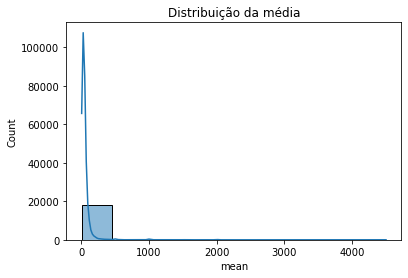

In [129]:
sns.histplot(df_seg['mean'], kde=True, bins=10).set(title='Distribuição da média')

count        mean  median     sum  days_since  mean_log
0      1   30.000000    30.0    30.0        3829  3.401197
1      7   71.428571    80.0   500.0         343  4.268698
2     10  115.800000   100.0  1158.0         758  4.751865
3      1   20.000000    20.0    20.0        1401  2.995732
4      2   50.000000    50.0   100.0        2970  3.912023

[Text(0.5, 1.0, 'Distribuição normal da média com log')]

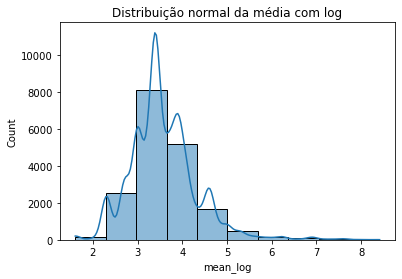

In [130]:
df_seg['mean_log'] = df_seg['mean'].apply(np.log)
display(df_seg.head())
sns.histplot(df_seg['mean_log'], kde=True, bins=10).set(title='Distribuição normal da média com log')

**3.2.1.2: Mediana (median)**

<AxesSubplot:xlabel='median', ylabel='Count'>

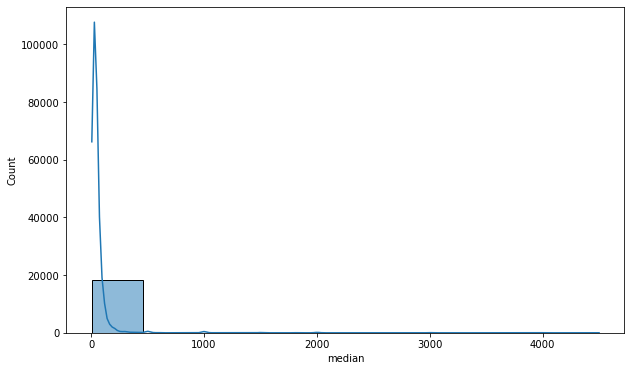

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(df_seg['median'], kde=True, bins=10)

<AxesSubplot:xlabel='median_log', ylabel='Count'>

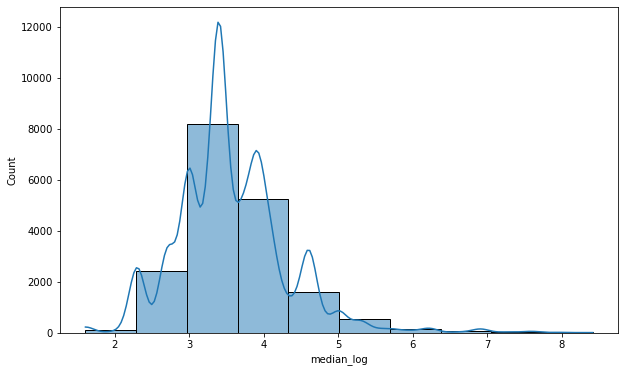

In [132]:
df_seg['median_log'] = df_seg['median'].apply(np.log)

plt.figure(figsize=(10, 6))
sns.histplot(df_seg['median_log'], kde=True, bins=10)

**3.2.1.3: Somatório (sum)**

<AxesSubplot:xlabel='sum', ylabel='Count'>

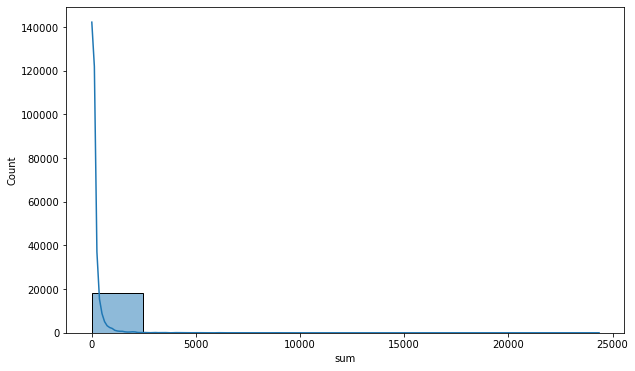

In [133]:
plt.figure(figsize=(10, 6))
sns.histplot(df_seg['sum'], kde=True, bins=10)

<AxesSubplot:xlabel='sum_log', ylabel='Count'>

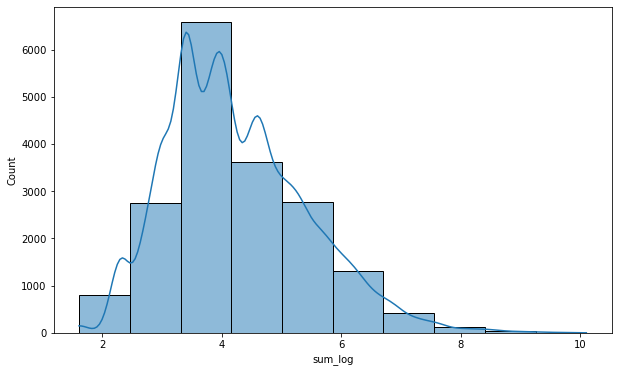

In [134]:
df_seg['sum_log'] = df_seg['sum'].apply(np.log)

plt.figure(figsize=(10, 6))
sns.histplot(df_seg['sum_log'], kde=True, bins=10)

**Skewness**<br/>
Vamos checar o skewness. Skewness próximo de zero indica que os dados estão normalmenete distribuídos. Caso o valor seja maior que zero significa que os dados estão mais a esquerda da distribuição normal, caso seja negativo, os dados estão mais a direita.

In [135]:
df_seg.skew()

count          2.948291
mean          14.619921
median        14.886556
sum           16.589933
days_since     0.534059
mean_log       1.172518
median_log     1.151319
sum_log        0.678704
dtype: float64

<h3>3.2.3) Padronização e escala dos dados</h3>

In [136]:
stand = StandardScaler()
#columns = ['count', 'mean_log', 'median_log', 'sum_log', 'days_since']
columns = ['count', 'mean_log', 'sum_log', 'days_since']

df_seg_scale = stand.fit_transform(df_seg[columns])
df_seg_scale

array([[-0.60690881, -0.23580188, -0.71836697,  2.38204349],
       [ 1.43612529,  0.89438649,  1.66882675, -0.84153018],
       [ 2.45764235,  1.52386076,  2.38143671, -0.45777141],
       ...,
       [-0.60690881, -0.76404585, -1.06240624, -1.12726864],
       [-0.60690881,  0.52997243, -0.21962691, -1.15408552],
       [-0.60690881,  3.42953758,  1.66882675, -1.1577844 ]])

<h2>3.3) Técnicas de Clustering</h2>

<h3>3.3.1) Escolhando a quantidade de Clusters</h3>

In [137]:
import sklearn.cluster as cluster
from tqdm import tqdm

inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(df_seg_scale)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:05<00:00,  1.55it/s]


Agora vamos computar o score de silhoueta. Aqui quanto maior o score, melhor.

In [138]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(df_seg_scale)
    silhouette[i] = silhouette_score(df_seg_scale, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:40<00:00,  5.04s/it]


Text(0.5, 0, 'Número de clusters')

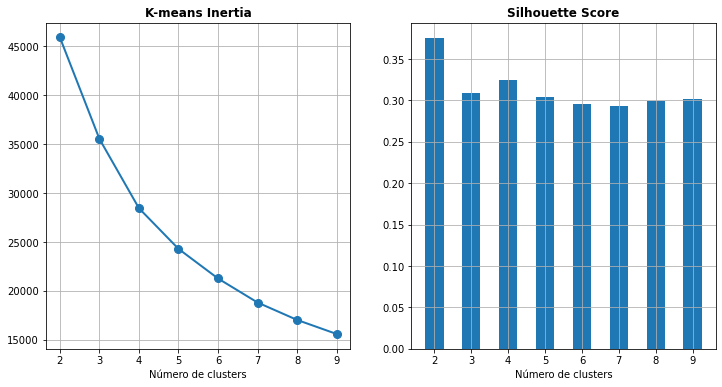

In [139]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8)
plt.xlabel('Número de clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Número de clusters')

<h3>3.3.2) Clustering Hierárquico</h3>

In [140]:
n_clusters = 4

hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(df_seg_scale)

df_seg['cluster_hc'] = y_hc
df_seg.head(3)

count        mean  median     sum  days_since  mean_log  median_log  \
0      1   30.000000    30.0    30.0        3829  3.401197    3.401197   
1      7   71.428571    80.0   500.0         343  4.268698    4.382027   
2     10  115.800000   100.0  1158.0         758  4.751865    4.605170   

    sum_log  cluster_hc  
0  3.401197           2  
1  6.214608           1  
2  7.054450           1

In [141]:
fig = px.scatter(df_seg, x='mean', y='sum', color='cluster_hc')

fig.update_layout(
    title='<span>Clusters de média por somatório</span>', 
    autosize=False,
    width=1200,
    height=600,
)

fig.show()

In [142]:
fig = px.scatter(df_seg, x='mean', y='count', color='cluster_hc')

fig.update_layout(
    title='<span>Clusters de média por somatório</span>', 
    autosize=False,
    width=1200,
    height=600,
)

fig.show()

<h3>3.3.3) Clustering Hierárquico com PCA<h3>

In [143]:
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(df_seg_scale)

n_clusters = 4
hc_pca = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
y_hc_pca=hc_pca.fit_predict(pca_2_result)

df_seg['cluster_pca'] = y_hc_pca

In [144]:
fig = px.scatter(x=pca_2_result.transpose()[0], y=pca_2_result.transpose()[1], color=y_hc_pca)

fig.update_layout(
    title='<span>Dados Clusterizados (Hierarchical Clustering Model - PCA)</span>', 
    autosize=False,
    width=1000,
    height=600,
    xaxis=dict(title='<span>PCA 1</span>'),
    yaxis=dict(title='<span>PCA 2</span>')
)

fig.show()

<h2>3.4) Análise de Resultados</h2>

<h3>3.4.1) Resultados obtidos sem PCA</h3>

In [145]:
df_res = df_seg.groupby(['cluster_hc'])['count', 'mean', 'sum', 'days_since'].agg(['mean', 'median', 'sum'])
df_res

count                      mean                        \
                mean median    sum        mean median            sum   
cluster_hc                                                             
0           1.881651    1.0  14500   32.339062   30.0  249204.815556   
1           7.954750    7.0  24787   65.215370   47.5  203211.091554   
2           1.480147    1.0   8872   32.616292   30.0  195502.052000   
3           1.926296    2.0   3084  260.122078  100.0  416455.447511   

                   sum                      days_since                    
                  mean median         sum         mean  median       sum  
cluster_hc                                                                
0            59.403162   50.0   457760.77   654.193486   623.0   5041215  
1           506.054111  325.0  1576864.61   399.504493   176.0   1244856  
2            47.962698   35.0   287488.41  2567.608609  2561.0  15390246  
3           544.803941  200.0   872231.11   875.004372   731.0   1400882

In [146]:
df_res[[['count', 'mean'], ['count', 'sum'], ['mean', 'mean'], ['sum', 'sum'], ['days_since', 'median']]]

count               mean         sum days_since
                mean    sum        mean         sum     median
cluster_hc                                                    
0           1.881651  14500   32.339062   457760.77      623.0
1           7.954750  24787   65.215370  1576864.61      176.0
2           1.480147   8872   32.616292   287488.41     2561.0
3           1.926296   3084  260.122078   872231.11      731.0

<h3>3.4.1) Resultados obtidos com PCA</h3>

In [147]:
df_res = df_seg.groupby(['cluster_pca'])['count', 'mean', 'sum', 'days_since'].agg(['mean', 'median', 'sum'])
df_res

count                      mean                        \
                  mean median    sum        mean median            sum   
cluster_pca                                                              
0             3.522159    3.0  23366   38.988296   37.5  258648.355216   
1             1.250422    1.0  10381   25.167710   25.0  208942.327857   
2            11.091356   10.0  11291   95.645834   57.5   97367.458864   
3             2.519285    2.0   6205  202.767058  100.0  499415.264683   

                    sum                      days_since                    
                   mean median         sum         mean  median       sum  
cluster_pca                                                                
0            123.364931   95.0   818402.95   702.556226   428.0   4660758  
1             30.320122   30.0   251717.65  1864.073115  2032.0  15475535  
2            963.971876  587.5   981323.37   163.275049    58.0    166214  
3            464.027986  210.0  1142900.93  1126.549736   828.0   2774692

In [148]:
df_res[[['count', 'mean'], ['count', 'sum'], ['mean', 'mean'], ['sum', 'sum'], ['days_since', 'median']]]

count               mean         sum days_since
                  mean    sum        mean         sum     median
cluster_pca                                                     
0             3.522159  23366   38.988296   818402.95      428.0
1             1.250422  10381   25.167710   251717.65     2032.0
2            11.091356  11291   95.645834   981323.37       58.0
3             2.519285   6205  202.767058  1142900.93      828.0

---
<h2>4) SEGMENTAÇÃO GERENCIAL PARA EQUIPES DE VENDAS</h2>

In [149]:
df_ger = df.groupby(['client_id'], as_index=False)['value'].agg(['count', 'mean', 'median', 'sum'])
df_days = df.groupby(['client_id'], as_index=False)['date'].agg(['min', 'max'])

current_date = df['date'].max() + pd.Timedelta(days=1)
df_days['min'] = (current_date - df_days['min']).dt.days
df_days['max'] = (current_date - df_days['max']).dt.days

df_ger = df_ger.join(df_days, lsuffix='client_id', rsuffix='client_id')
df_ger.columns = ['quantidade', 'valor_medio', 'mediana', 'total_gasto', 'primeira_compra', 'ultima_compra']

df_ger.head()

quantidade  valor_medio  mediana  total_gasto  primeira_compra  \
client_id                                                                   
10                  1    30.000000     30.0         30.0             3829   
80                  7    71.428571     80.0        500.0             3751   
90                 10   115.800000    100.0       1158.0             3783   
120                 1    20.000000     20.0         20.0             1401   
130                 2    50.000000     50.0        100.0             3710   

           ultima_compra  
client_id                 
10                  3829  
80                   343  
90                   758  
120                 1401  
130                 2970

In [150]:
def calculaSegmento(dias):
    if dias > 365 * 3:
        return  'inativo'
    elif dias > 365 * 2:
        return 'frio'
    elif dias > 365:
        return 'quente'
    elif dias <= 365:
        return 'ativo'    


In [151]:
df_ger['segmento'] = df_ger['ultima_compra'].apply(calculaSegmento)

df_ger.loc[(df_ger['segmento'] == 'quente') & (df_ger['valor_medio'] < 80), 'segmento'] = 'quente - valor baixo'
df_ger.loc[(df_ger['segmento'] == 'quente') & (df_ger['valor_medio'] >= 80), 'segmento'] = 'quente - valor alto'

df_ger.loc[(df_ger['segmento'] == 'ativo') & (df_ger['quantidade'] == 1), 'segmento'] = 'ativo - novo'

df_ger.loc[(df_ger['segmento'] == 'ativo') & (df_ger['valor_medio'] < 80), 'segmento'] = 'ativo - valor baixo'
df_ger.loc[(df_ger['segmento'] == 'ativo') & (df_ger['valor_medio'] >= 80), 'segmento'] = 'ativo - valor alto'


In [152]:
df_ger.head()

quantidade  valor_medio  mediana  total_gasto  primeira_compra  \
client_id                                                                   
10                  1    30.000000     30.0         30.0             3829   
80                  7    71.428571     80.0        500.0             3751   
90                 10   115.800000    100.0       1158.0             3783   
120                 1    20.000000     20.0         20.0             1401   
130                 2    50.000000     50.0        100.0             3710   

           ultima_compra             segmento  
client_id                                      
10                  3829              inativo  
80                   343  ativo - valor baixo  
90                   758                 frio  
120                 1401              inativo  
130                 2970              inativo

In [153]:
df_pivot = pd.pivot_table(df_ger, index='segmento', aggfunc=[np.count_nonzero, np.mean, np.sum, np.min, np.max])
df_pivot = df_pivot[[['count_nonzero', 'quantidade'], ['mean', 'valor_medio'], ['sum', 'total_gasto'], ['amax', 'primeira_compra'], ['amin', 'ultima_compra']]]

display(df_pivot)

count_nonzero        mean         sum            amax  \
                        quantidade valor_medio total_gasto primeira_compra   
segmento                                                                     
ativo - novo                  1464   77.819816   113928.21             360   
ativo - valor alto             762  203.232845   898156.45            4010   
ativo - valor baixo           3172   37.926008   706291.47            4012   
frio                          1903   51.739893   232402.29            4016   
inativo                       9158   48.112771   850306.56            4016   
quente - valor alto            286  273.873023   224935.20            4004   
quente - valor baixo          1672   34.614243   168324.72            4011   

                              amin  
                     ultima_compra  
segmento                            
ativo - novo                     1  
ativo - valor alto               1  
ativo - valor baixo              1  
frio                           731  
inativo                       1096  
quente - valor alto            366  
quente - valor baixo           366

**Computando faturamento**

In [154]:
df_faturamento = df.loc[df['date'] >= '2015-01-01']
df_faturamento = pd.DataFrame(df_faturamento.groupby('client_id')['value'].sum())

df_ger_fat = df_ger.merge(df_faturamento, left_index=True, right_index=True, how='left')


df_ger_fat.rename(columns={'value': 'faturamento_2015'}, inplace = True)

df_ger_fat['faturamento_2015'].fillna(0, inplace=True)

df_ger_fat.head()

quantidade  valor_medio  mediana  total_gasto  primeira_compra  \
client_id                                                                   
10                  1    30.000000     30.0         30.0             3829   
80                  7    71.428571     80.0        500.0             3751   
90                 10   115.800000    100.0       1158.0             3783   
120                 1    20.000000     20.0         20.0             1401   
130                 2    50.000000     50.0        100.0             3710   

           ultima_compra             segmento  faturamento_2015  
client_id                                                        
10                  3829              inativo               0.0  
80                   343  ativo - valor baixo              80.0  
90                   758                 frio               0.0  
120                 1401              inativo               0.0  
130                 2970              inativo               0.0

In [155]:
df_faturamento = df_ger_fat.groupby(['segmento'], as_index=False)['faturamento_2015'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)

df_faturamento.head(10)

sum        mean
segmento                                   
ativo - valor alto    209437.00  274.851706
ativo - valor baixo   155028.92   48.874187
ativo - novo          113928.21   77.819816
frio                       0.00    0.000000
inativo                    0.00    0.000000
quente - valor alto        0.00    0.000000
quente - valor baixo       0.00    0.000000

---
<h2>5) PREVISÃO DE FATURAMENTO</h2>

<h2>5.0) Importações</h2>

<h2></h2>

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import KFold, cross_val_score

import re

from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb

<h2>5.1) Previsão para cada Cliente</h2>

<h3>5.1.1) Pré processamento</h3>

In [157]:
df_pred = df.merge(df_ger_fat, left_on='client_id', right_index=True, how='inner')[['client_id', 'year', 'primeira_compra', 'ultima_compra', 'valor_medio', 'total_gasto', 'segmento', 'value']]
df_pred.reset_index(drop=True, inplace=True)
df_pred.head()

client_id  year  primeira_compra  ultima_compra  valor_medio  total_gasto  \
0        760  2009             3293           1273         38.0        190.0   
1        760  2008             3293           1273         38.0        190.0   
2        760  2007             3293           1273         38.0        190.0   
3        760  2006             3293           1273         38.0        190.0   
4        760  2012             3293           1273         38.0        190.0   

  segmento  value  
0  inativo   25.0  
1  inativo   50.0  
2  inativo   60.0  
3  inativo   30.0  
4  inativo   25.0

In [158]:
segmento_map = {
    'ativo - valor baixo': 1,
    'inativo': 0,
    'quente - valor baixo':0.5,
    'ativo - valor alto': 0.5,
    'frio': 0.25,
    'ativo - novo': 1,
    'quente - valor alto': 1
}

df_pred['segmento_map'] = df_pred['segmento'].map(segmento_map)

df_pred.head()

client_id  year  primeira_compra  ultima_compra  valor_medio  total_gasto  \
0        760  2009             3293           1273         38.0        190.0   
1        760  2008             3293           1273         38.0        190.0   
2        760  2007             3293           1273         38.0        190.0   
3        760  2006             3293           1273         38.0        190.0   
4        760  2012             3293           1273         38.0        190.0   

  segmento  value  segmento_map  
0  inativo   25.0           0.0  
1  inativo   50.0           0.0  
2  inativo   60.0           0.0  
3  inativo   30.0           0.0  
4  inativo   25.0           0.0

<h3>5.1.2) Divisão em Treino e Teste</h3>

In [159]:
df_pred.sort_values(by=['year', 'client_id'], inplace=True)

df_treino = df_pred.loc[df_pred['year'] < 2015]
df_target = df_pred.loc[df_pred['year'] >= 2015]


colunas = ['client_id', 'year', 'primeira_compra', 'ultima_compra', 'valor_medio',
       'total_gasto', 'segmento_map']

X_train = df_treino[colunas]
Y_train = df_treino['value']

X_test = df_target[colunas]
Y_test = df_target['value']


<h3>5.1.3) Padronização e Escala</h3>

In [160]:
stand = StandardScaler()

X_stand_train = stand.fit_transform(X_train)
X_stand_test = stand.transform(X_test)

<h3>5.1.4) Validação Cruzada</h3>

In [161]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

<h3>5.1.4) Modelagem inicial</3>

**LASSO Regression**<br/>
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [164]:
lasso = Lasso(alpha =0.0005, random_state=1)

score = cross_val_score(lasso, X_stand_train, Y_train, cv=k_fold, n_jobs=1, scoring='r2')
print(score)

lasso = lasso.fit(X_stand_train, Y_train)
preds_lasso = lasso.predict(X_stand_test)
R2 = r2_score(Y_test, preds_lasso)
print(R2)

[0.77746512 0.78010354 0.85285237 0.85081713 0.84228703 0.7934436
 0.72887733 0.87239205 0.78521574 0.81461848]
0.8662251392789916


**XGB Regressor**

In [167]:
model_xgb = xgb.XGBRegressor()

score = cross_val_score(model_xgb, X_stand_train, Y_train, cv=k_fold, n_jobs=1, scoring='r2')
print(score)


model_xgb.fit(X_stand_train, Y_train)

preds_xgb = model_xgb.predict(X_stand_test)
R2 = r2_score(Y_test, preds_xgb)
print(R2)

[0.68642551 0.79820392 0.59815145 0.74521155 0.69437287 0.59213931
 0.71961568 0.76409642 0.75049671 0.6689477 ]
0.857017618660201


<h3>5.1.5) Auto Model Machine Learning</h3>

In [168]:
list_estimators = [
    {'name': 'Lasso Regressor',
     'model': Lasso(),
     'params': {}
    },
    
    {'name': 'ElasticNet',
     'model': ElasticNet(),
     'params': {}
    },
    
    {'name': 'Gradient Boosting',
     'model': GradientBoostingRegressor(),
     'params': {}
    },
    
    {'name': 'Light GBM',
     'model': lgb.LGBMRegressor(),
     'params': {}
    },

     {'name': 'XGB Regressor',
     'model': xgb.XGBRegressor(),
     'params': {}
    }
    
]

In [171]:
def autoModel(X_train, Y_train, X_test, Y_test):

    #Inicializando variáveis
    list_all_results = []
    list_standardization = [Normalizer(), StandardScaler(), RobustScaler()]

    best_acc = 0
    best_model = {
        'name': 'null',
        'model_grid': 'null',
        'best_params': 'null',
        'stand': 'null',
        'r2_train': 0,
        'r2_test': 0
    }

    #Para cada tipo de padronização iteramos
    for stand in list_standardization:

        #Para cada algoritmo na lista de algoritmos
        for estimator in list_estimators:
            
            #Criação do objeto GridSearch
            model_grid = GridSearchCV(estimator=estimator['model'], param_grid=estimator['params'], cv=2)
            
            #Criação do pipeline de execução
            pipe = Pipeline(steps=[('scale', stand), ('grid', model_grid)])
            pipe.fit(X_train, Y_train)

            #Realizando as previsões para cada dataset. Treino e teste
            preds_train = pipe.predict(X_train)
            preds_test = pipe.predict(X_test)
            
            #Otendo os resultados para cada métrica
            r2_train = r2_score(preds_train, Y_train)
            r2_test = r2_score(preds_test, Y_test)

            #Exibindo os resultados por acurácia, f1 score e matriz de confusão de treino e teste para cada algoritmo.
            print('Algoritmo: [{}]'.format(estimator['name'])) 
            print('stand:[{}] [R2 Score] train:[{}%]  test:[{}%]'.format(stand, round(r2_train * 100, 2), round(r2_test * 100, 2)))
            print('\n')

            #Armazenando sempre o melhor resultado
            if r2_test > best_model['r2_test']:
                best_model['name'] = estimator['name'],
                best_model['model_grid'] = pipe['grid'].estimator,
                best_model['best_params'] =  pipe[1].best_params_,
                best_model['stand'] = stand
                best_model['r2_train'] = r2_train
                best_model['r2_test'] = r2_test

            #Armazenando todos os resultados em uma lista para exibir em um dataframe final
            list_all_results.append(
                {'name': estimator['name'],
                'standardization': re.sub(r'[()]', '', str(stand)),
                'R2 Score': round(r2_test * 100, 2)
                })

    return best_model, list_all_results

In [172]:
best_model, list_all_results = autoModel(X_stand_train, Y_train, X_stand_test, Y_test)

Algoritmo: [Lasso Regressor]
stand:[Normalizer()] [R2 Score] train:[-106.71%]  test:[-342.54%]


Algoritmo: [ElasticNet]
stand:[Normalizer()] [R2 Score] train:[-31596.01%]  test:[-100756.74%]


Algoritmo: [Gradient Boosting]
stand:[Normalizer()] [R2 Score] train:[79.87%]  test:[54.38%]


Algoritmo: [Light GBM]
stand:[Normalizer()] [R2 Score] train:[83.99%]  test:[69.63%]


Algoritmo: [XGB Regressor]
stand:[Normalizer()] [R2 Score] train:[94.82%]  test:[74.04%]


Algoritmo: [Lasso Regressor]
stand:[StandardScaler()] [R2 Score] train:[76.55%]  test:[82.47%]


Algoritmo: [ElasticNet]
stand:[StandardScaler()] [R2 Score] train:[39.37%]  test:[25.2%]


Algoritmo: [Gradient Boosting]
stand:[StandardScaler()] [R2 Score] train:[82.16%]  test:[80.73%]


Algoritmo: [Light GBM]
stand:[StandardScaler()] [R2 Score] train:[84.8%]  test:[72.54%]


Algoritmo: [XGB Regressor]
stand:[StandardScaler()] [R2 Score] train:[94.95%]  test:[83.41%]


Algoritmo: [Lasso Regressor]
stand:[RobustScaler()] [R2 Score

In [ ]:
r2_score